# Egor Bezriadin

## Research question/interests

Recent Grads dataset, which our project team found on [kaggle.com](kaggle.com), contains a vast amount of information about majors of students graduated from colleges across all of the United States during the unknow period of time (approximately 2008 - 2012). It includes fields like major itself, its category, students' sex info, post-graduation employment type and earning percentiles. There are a lots of possible things to explore, but personally I am interested in things like major categories popularity amongst students, and what are the chances of finding a job in a specific field after graduation.

1. What is the ratio between amount of programs offered in the major category and the amount of graduate students from this field?
2. In which spheres students are able to find jobs that are worthy of their education?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('../data/raw/recent-grads.csv')

# First look at the dataset

In [3]:
print("The first and the last 5 rows of the dataset: ")
data.head()

The first and the last 5 rows of the dataset: 


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
data.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


## Milestone 3

#  Task 1
#  Data Analysis

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
print("Number of rows and columns in the dataset:", data.shape, "\n")
print("Names of columns in the dataset:\n", data.columns)

Number of rows and columns in the dataset: (173, 21) 

Names of columns in the dataset:
 Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')


In [7]:
print("Table of unique values in the dataset:")
print(data.nunique())

Table of unique values in the dataset:
Rank                    173
Major_code              173
Major                   173
Total                   172
Men                     172
Women                   171
Major_category           16
ShareWomen              172
Sample_size             147
Employed                171
Full_time               173
Part_time               170
Full_time_year_round    173
Unemployed              161
Unemployment_rate       169
Median                   59
P25th                    48
P75th                    54
College_jobs            173
Non_college_jobs        173
Low_wage_jobs           166
dtype: int64


In [8]:
print("List of major categories:", data['Major_category'].unique())

print("\nChecking if there's any null values:")
data.isnull().sum()

List of major categories: ['Engineering' 'Business' 'Physical Sciences' 'Law & Public Policy'
 'Computers & Mathematics' 'Agriculture & Natural Resources'
 'Industrial Arts & Consumer Services' 'Arts' 'Health' 'Social Science'
 'Biology & Life Science' 'Education' 'Humanities & Liberal Arts'
 'Psychology & Social Work' 'Communications & Journalism'
 'Interdisciplinary']

Checking if there's any null values:


Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [9]:
data.describe(include='object').T

,count,unique,top,freq
Major,173,173,PETROLEUM ENGINEERING,1
Major_category,173,16,Engineering,29


In [10]:
data.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
Total,172.0,39370.081395,63483.491009,124.0,4549.750000,15104.000000,38909.750000,393735.000000
Men,172.0,16723.406977,28122.433474,119.0,2177.500000,5434.000000,14631.000000,173809.000000
Women,172.0,22646.674419,41057.330740,0.0,1778.250000,8386.500000,22553.750000,307087.000000
ShareWomen,172.0,0.522223,0.231205,0.0,0.336026,0.534024,0.703299,0.968954
Unemployment_rate,173.0,0.068191,0.030331,0.0,0.050306,0.067961,0.087557,0.177226


Distribution Plots for percentile earnings and employment:

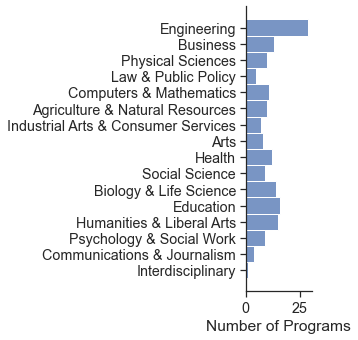

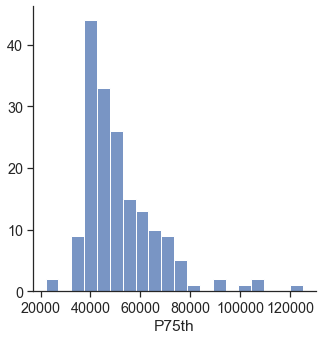

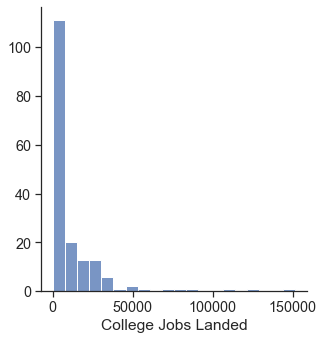

In [82]:
sns.set_theme(style="ticks", font_scale=1.3)
sns.displot(data, y=data['Major_category']).set_axis_labels("Number of Programs", "")
sns.displot(data['P75th'], bins=20).set_axis_labels("P75th", "")
sns.displot(data['College_jobs'], bins=20).set_axis_labels("College Jobs Landed", "")

# Task 2-3

Load the unprocessed file:

In [22]:
import project_functions1 as p1

In [23]:
pathRaw = '../data/raw/recent-grads.csv'
rawData = p1.load_raw(pathRaw)
rawData

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


# Processing data
Drop the columns we do not need, drop any rows with null values, sort if needed

In [24]:
cdf = p1.process_data(pathRaw) #cdf = clean dataframe

In [25]:
cdf.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
Total,172.0,39370.081395,63483.491009,124.0,4549.750000,15104.000000,38909.750000,393735.000000
Men,172.0,16723.406977,28122.433474,119.0,2177.500000,5434.000000,14631.000000,173809.000000
Women,172.0,22646.674419,41057.330740,0.0,1778.250000,8386.500000,22553.750000,307087.000000
Unemployment_rate,172.0,0.068024,0.030340,0.0,0.050261,0.067544,0.087247,0.177226


In [26]:
cdf.describe(include='int64').T

,count,mean,std,min,25%,50%,75%,max
Employed,172.0,31355.808140,50777.428650,0.0,3734.75,12031.5,31701.25,307933.0
Unemployed,172.0,2428.412791,4121.730452,0.0,299.50,905.0,2397.00,28169.0
Median,172.0,40076.744186,11461.388773,22000.0,33000.00,36000.0,45000.00,110000.0
P25th,172.0,29486.918605,9190.769927,18500.0,24000.00,27000.0,33250.00,95000.0
P75th,172.0,51386.627907,14882.278650,22000.0,41750.00,47000.0,58500.00,125000.0
College_jobs,172.0,12387.401163,21344.967522,0.0,1744.75,4467.5,14595.75,151643.0
Non_college_jobs,172.0,13354.325581,23841.326605,0.0,1594.00,4603.5,11791.75,148395.0
Low_wage_jobs,172.0,3878.633721,6960.467621,0.0,336.75,1238.5,3496.00,48207.0


After that, we group the dataset by major categories (because it is much more difficult to deal with separate majors), fix unemployment rate (which is higher that 1 in some of the rows) and add new column "Number of Programs" in each major category

In [27]:
cdf = p1.group_by_majorCat(cdf)
cdf = p1.fix_unempoyment(cdf)
cdf

,Major_category,Total,Men,Women,Employed,Unemployed,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Amount_of_Programs,Correct_Unemployment_Rate
0,Agriculture & Natural Resources,75620.0,40357.0,35263.0,63794,3486,316000,222000,410100,18677,33217,7414,9,0.046099
1,Arts,357130.0,134390.0,222740.0,288114,28228,264500,175700,349300,94785,163720,60116,8,0.079041
2,Biology & Life Science,453862.0,184919.0,268943.0,302797,22854,509900,372600,645200,151233,127182,42742,14,0.050355
3,Business,1302376.0,667852.0,634524.0,1088742,79877,566000,435000,713000,148538,496570,126788,13,0.061332
4,Communications & Journalism,392601.0,131921.0,260680.0,330660,26852,138000,105000,179900,86556,172992,49595,4,0.068395
5,Computers & Mathematics,299008.0,208725.0,90283.0,237894,18373,470200,322200,639000,137859,74463,16136,11,0.061447
6,Education,559129.0,103526.0,455603.0,479839,24969,517600,425450,617000,338713,121761,40870,16,0.044657
7,Engineering,537583.0,408307.0,129276.0,420372,29817,1664100,1205100,2043000,269767,102383,25079,29,0.055465
8,Health,463230.0,75517.0,387713.0,372147,22213,441900,314000,603000,245441,110496,31270,12,0.047952
9,Humanities & Liberal Arts,713468.0,272846.0,440622.0,544118,51101,478700,352400,631100,192650,276532,94240,15,0.071623


# Making seaborn Plots

Text(0, 0.5, ' ')

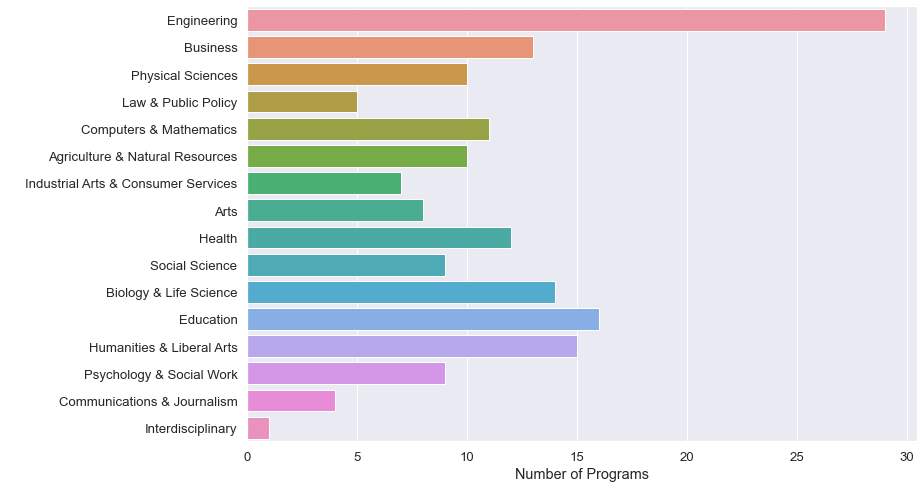

In [73]:
sns.set(rc = {'figure.figsize': (12,8)})
sns.set(font_scale=1.2)
ax = sns.countplot(y='Major_category', data=rawData)
ax.set_xlabel("Number of Programs")
ax.set_ylabel(" ")

* In this graph we can see prevailing amount of engineering major category, which means it is one of the most popular and diverse categories. Next most various categories are Education and Humanities & Liberal Arts, which have almost twice less options. 

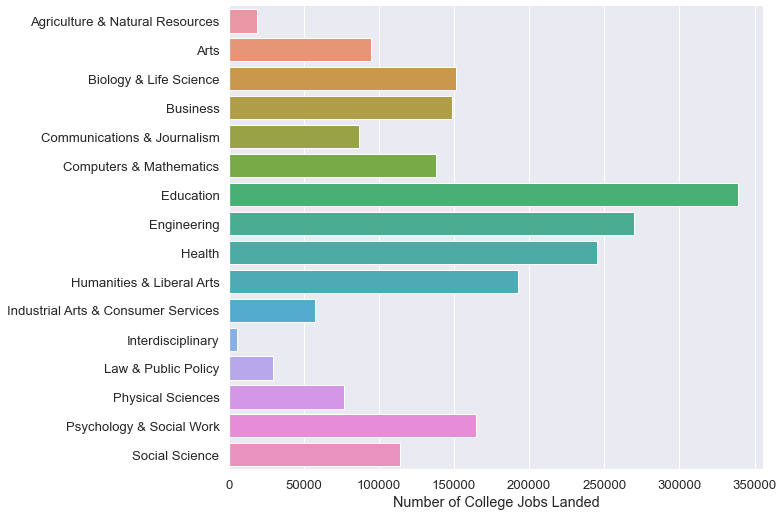

In [80]:
ax = sns.catplot(x="College_jobs", y="Major_category", data = cdf, kind="bar")
ax.fig.set_size_inches(30, 8)
ax.set_axis_labels("Number of College Jobs Landed", "")
plt.show()

* The graph demonstrates amount of graduates employed full time after finishing their studies. Suprisingly, Businesses majors are leading here by more than 2 times, leaving other categories far behind. At the same time, Agriculture & Natural Resources seems to be the least favourable by the employers for the full time positions, meanwhile average numbers are being held by Engineering, Humanities & Liberal Arts, Education and Social Sciences.

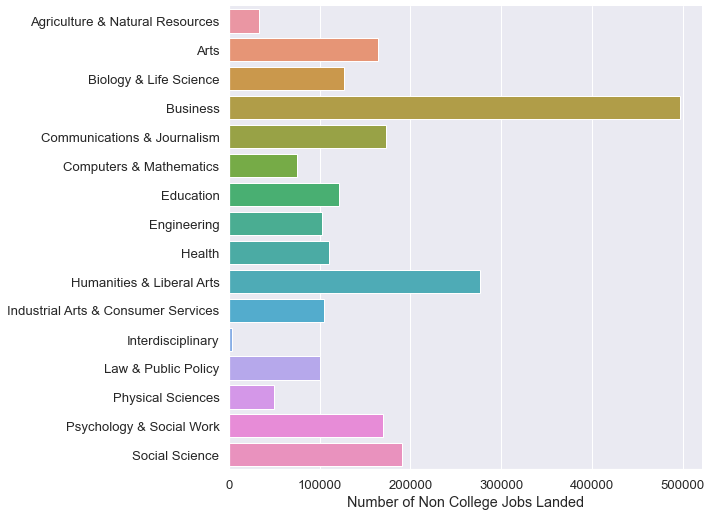

In [79]:
ax = sns.catplot(x="Non_college_jobs", y="Major_category", data = cdf, kind="bar")
ax.fig.set_size_inches(30, 8)
ax.set_axis_labels("Number of Non College Jobs Landed", "")
plt.show()

* Situations is a little bit different with part time jobs. Here, Humanities & Liberal Arts takes over the leadership from Business. Moreover, all of the other categories get a significantly higher numbers. However, Agriculture & Natural Resources continues to be at its lowest.

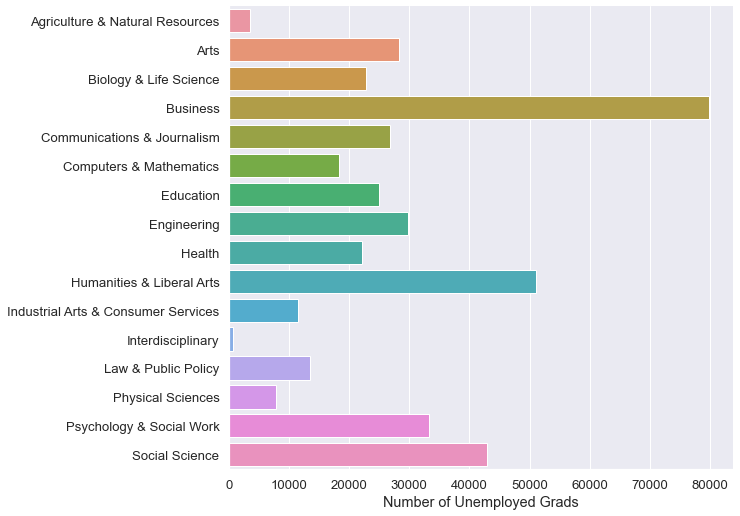

In [78]:
ax = sns.catplot(x="Unemployed", y="Major_category", data = cdf, kind="bar")
ax.fig.set_size_inches(30, 8)
ax.set_axis_labels("Number of Unemployed Grads", "")
plt.show()

* When the talk comes to the unemployed grad students, surprisingly, the distribution do not change too much. Business is at its peak, followed by Humanities & Liberal Arts and Social Sciences.